/home/ngaggion/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


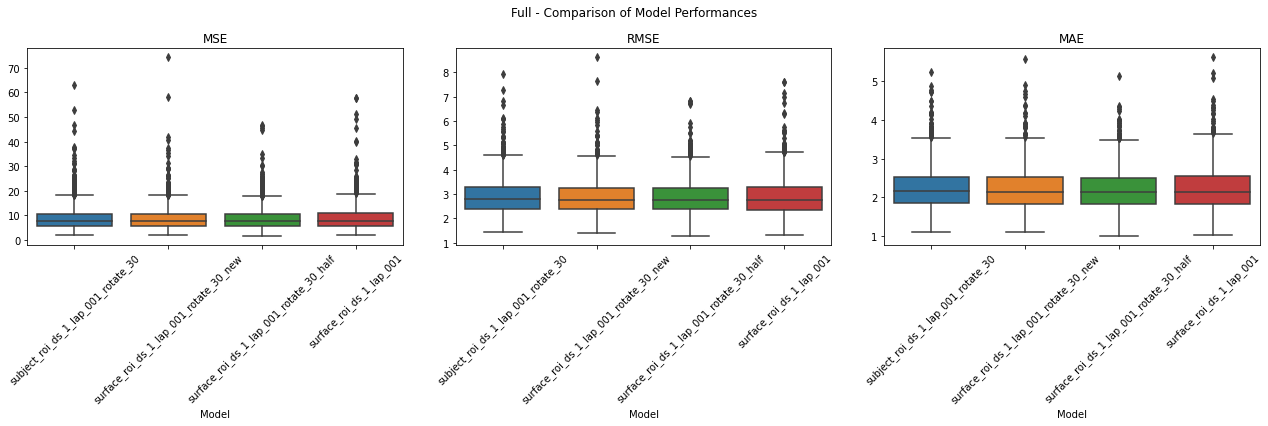

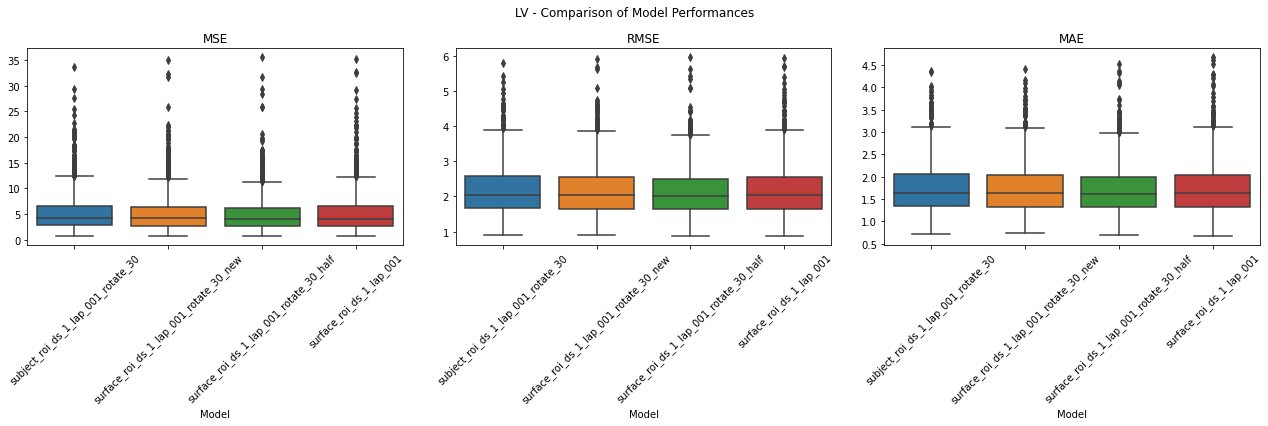

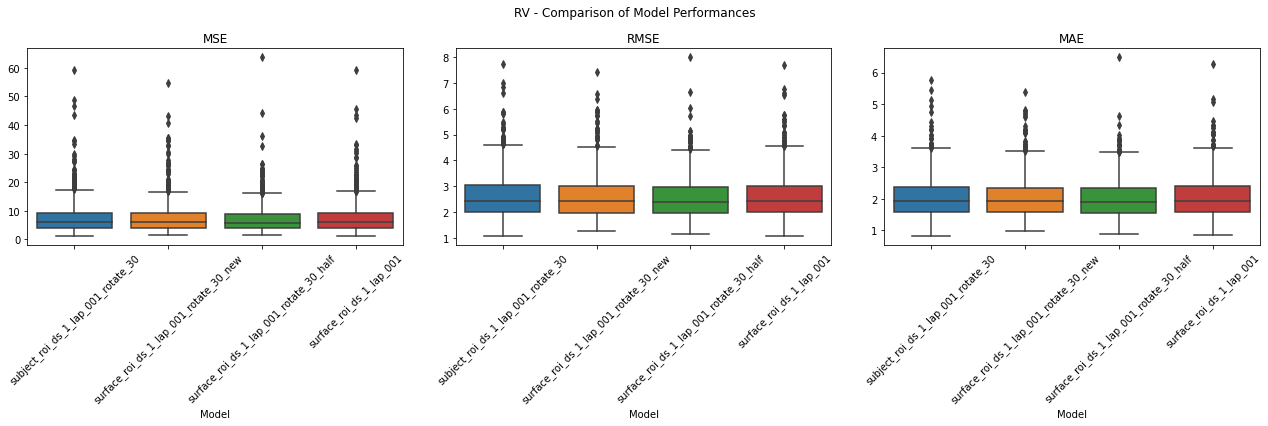

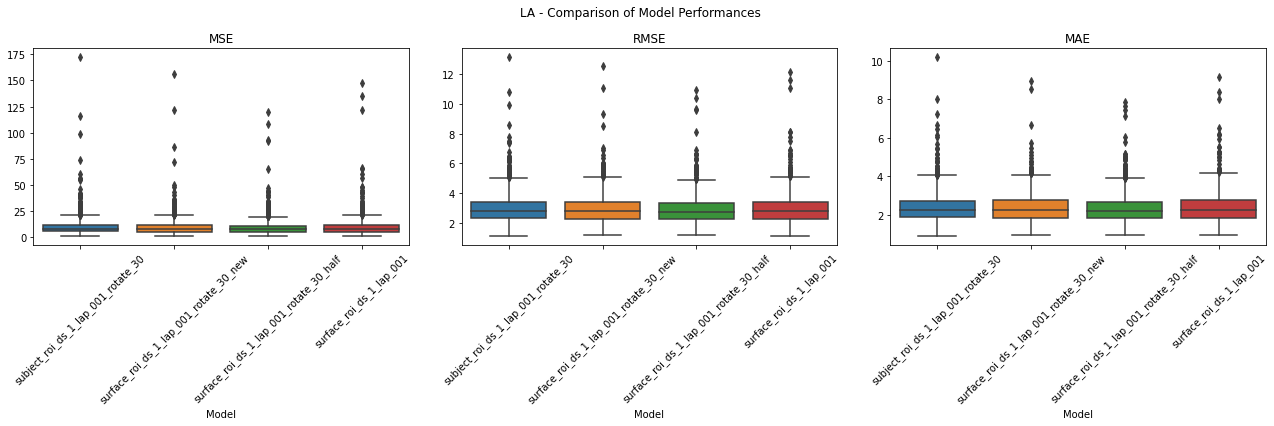

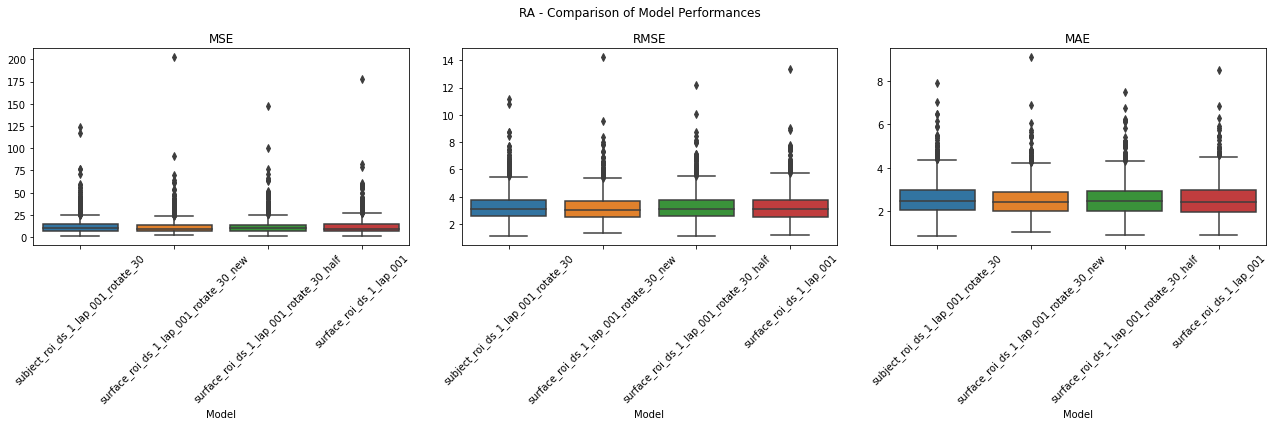

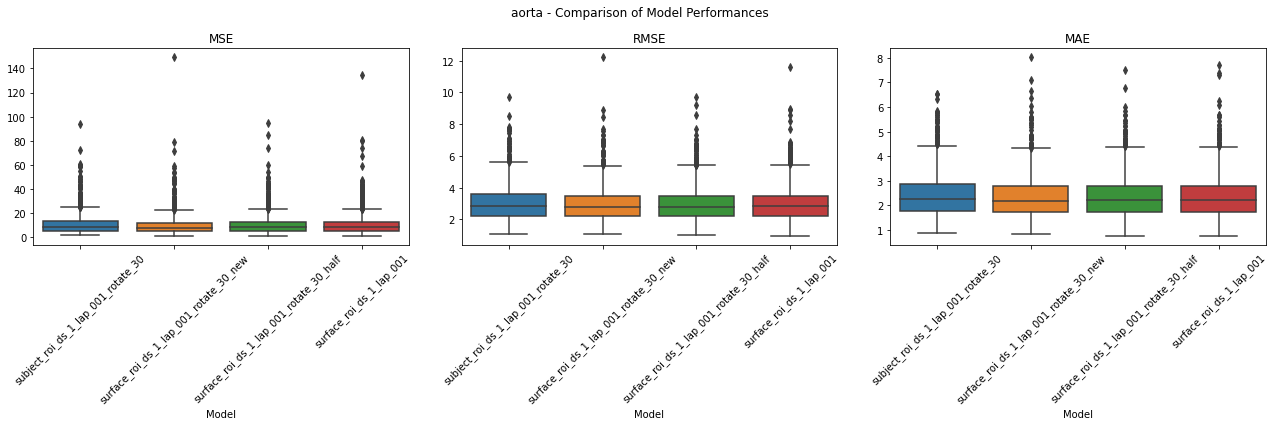

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df[['Model', 'Subpart', 'MSE', 'RMSE', 'MAE']]

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "eval.csv")
    try:
        assert os.path.exists(eval_file)
    except AssertionError:
        print(f"Missing evaluation results for {model_name}")
        continue
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

# Create boxplots for MSE, RMSE, and MAE for each subpart
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']
metrics = ['MSE', 'RMSE', 'MAE']

for subpart in subparts:
    fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))

    for i, metric in enumerate(metrics):
        subset = all_results[all_results['Subpart'] == subpart]
        sns.boxplot(x="Model", y=metric, data=subset, ax=axes[i])
        axes[i].set_title(metric)
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', rotation=45)

    plt.suptitle(f"{subpart} - Comparison of Model Performances")
    plt.tight_layout()
    plt.show()


In [2]:
def get_nice_dataframe_sub(df, metrics, subpart = "Full", vertical = False):
    models = df["Model"].unique()
    df = df.copy()
    df = df[df["Subpart"] == subpart]

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df

metrics = ['MAE', 'MSE', 'RMSE']
subparts = ['Full', 'LV', 'RV', 'LA', 'RA', 'aorta']

for subpart in subparts:
    print(subpart)
    nice = get_nice_dataframe_sub(all_results, metrics, subpart, vertical=1)
    display(nice)


Full


,subject_roi_ds_1_lap_001_rotate_30,surface_roi_ds_1_lap_001_rotate_30_new,surface_roi_ds_1_lap_001_rotate_30_half,surface_roi_ds_1_lap_001
MAE,2.25 (0.58),2.21 (0.55),2.20 (0.55),2.23 (0.58)
MSE,9.21 (5.57),8.89 (5.36),8.84 (5.09),9.06 (5.58)
RMSE,2.93 (0.78),2.89 (0.75),2.88 (0.75),2.90 (0.79)


LV


,subject_roi_ds_1_lap_001_rotate_30,surface_roi_ds_1_lap_001_rotate_30_new,surface_roi_ds_1_lap_001_rotate_30_half,surface_roi_ds_1_lap_001
MAE,1.75 (0.57),1.74 (0.56),1.71 (0.55),1.75 (0.60)
MSE,5.30 (3.80),5.26 (3.81),5.03 (3.61),5.34 (4.08)
RMSE,2.19 (0.71),2.18 (0.71),2.13 (0.69),2.18 (0.75)


RV


,subject_roi_ds_1_lap_001_rotate_30,surface_roi_ds_1_lap_001_rotate_30_new,surface_roi_ds_1_lap_001_rotate_30_half,surface_roi_ds_1_lap_001
MAE,2.03 (0.63),2.01 (0.60),2.00 (0.60),2.03 (0.62)
MSE,7.43 (5.33),7.27 (5.04),7.13 (4.86),7.45 (5.20)
RMSE,2.60 (0.83),2.58 (0.79),2.55 (0.78),2.60 (0.81)


LA


,subject_roi_ds_1_lap_001_rotate_30,surface_roi_ds_1_lap_001_rotate_30_new,surface_roi_ds_1_lap_001_rotate_30_half,surface_roi_ds_1_lap_001
MAE,2.38 (0.81),2.34 (0.75),2.32 (0.76),2.36 (0.80)
MSE,10.10 (9.42),9.73 (8.61),9.60 (8.40),9.93 (9.38)
RMSE,3.00 (1.04),2.96 (0.99),2.93 (0.99),2.97 (1.04)


RA


,subject_roi_ds_1_lap_001_rotate_30,surface_roi_ds_1_lap_001_rotate_30_new,surface_roi_ds_1_lap_001_rotate_30_half,surface_roi_ds_1_lap_001
MAE,2.60 (0.81),2.53 (0.77),2.56 (0.78),2.55 (0.80)
MSE,12.14 (9.65),11.48 (9.78),11.82 (9.49),11.75 (9.74)
RMSE,3.31 (1.09),3.22 (1.05),3.27 (1.06),3.25 (1.09)


aorta


,subject_roi_ds_1_lap_001_rotate_30,surface_roi_ds_1_lap_001_rotate_30_new,surface_roi_ds_1_lap_001_rotate_30_half,surface_roi_ds_1_lap_001
MAE,2.41 (0.89),2.37 (0.88),2.35 (0.86),2.36 (0.87)
MSE,10.48 (8.87),10.14 (9.17),10.05 (8.47),10.09 (9.06)
RMSE,3.03 (1.13),2.98 (1.12),2.98 (1.09),2.97 (1.11)


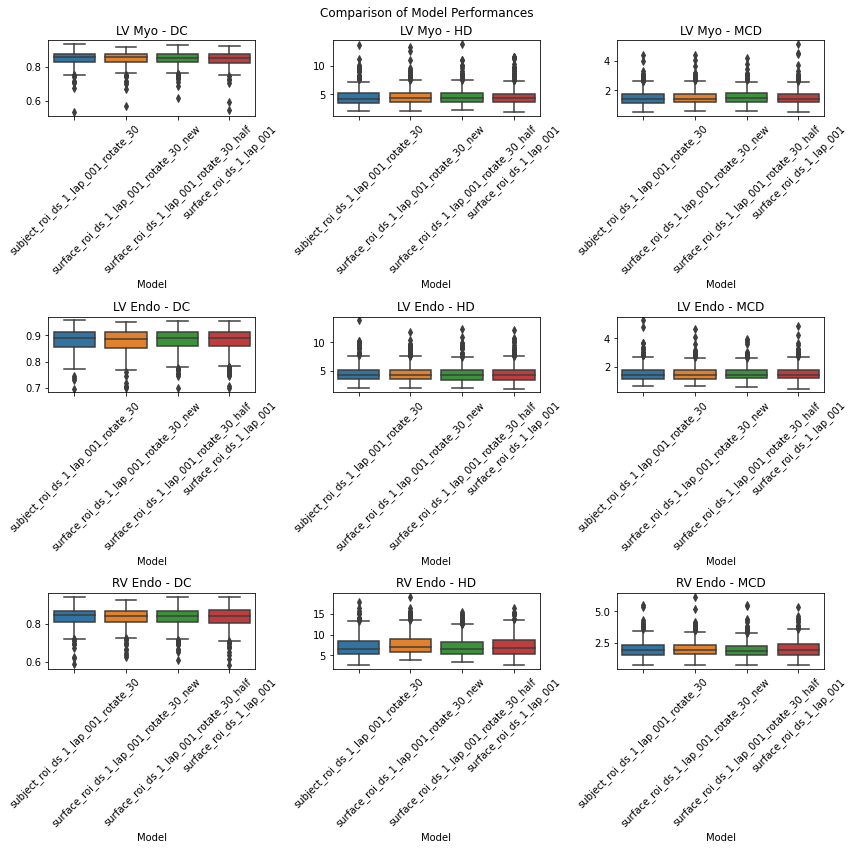

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to read and process the evaluation results from a CSV file
def process_results(csv_file, model_name):
    df = pd.read_csv(csv_file)
    df['Model'] = model_name
    return df

# Directory containing the evaluation results
results_dir = "../Predictions/Surface/"

# DataFrame to store the evaluation results for each subpart
all_results = pd.DataFrame()

# Iterate over the models in the directory
for model_name in os.listdir(results_dir):
    model_path = os.path.join(results_dir, model_name)
    eval_file = os.path.join(model_path, "metrics.csv")

    if not os.path.exists(eval_file):
        continue
    
    # Process the evaluation results for the current model
    results = process_results(eval_file, model_name)
    all_results = all_results.append(results, ignore_index=True)

metrics = ['LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, metric in enumerate(metrics):
    sns.boxplot(x="Model", y=metric, data=all_results, ax=axes[i // 3, i%3])
    axes[i // 3, i%3].set_title(metric)
    axes[i // 3, i%3].set_ylabel('')
    axes[i // 3, i%3].tick_params(axis='x', rotation=45)

plt.suptitle("Comparison of Model Performances")
plt.tight_layout()
plt.show()


In [4]:
def get_nice_dataframe(df, metrics, vertical = False):
    models = df["Model"].unique()

    # creates a dataframe where each metric has a column for its mean and std.
    # the mean and std. are computed for each model
    # the dataframe is then saved as a csv file
    df_std = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_std[metric] = df.groupby(["Model"])[metric].std()

    df_mean = pd.DataFrame(columns=metrics)
    for metric in metrics:
        df_mean[metric] = df.groupby(["Model"])[metric].mean()

    df_mean = df_mean.round(2)
    df_std = df_std.round(2)

    #combine both dataframes, intercalating columns

    empty_df = pd.DataFrame(columns = metrics)
    for metric in metrics:
        i = 0
        for model in models:
            mean_str = str(df_mean.loc[model, metric]) 
            std_str = str(df_std.loc[model, metric]) 
            if len(mean_str) == 3 or (mean_str[2] == '.' and len(mean_str) == 4):
                mean_str += '0'
            if len(std_str) == 3 or (std_str[2] == '.' and len(std_str) == 4):
                std_str += '0'
              
            empty_df.loc[model, metric] = mean_str + " (" + std_str + ")"
            i+=1

    # transposes the dataframe
    if vertical:
        empty_df = empty_df.T
    
    return empty_df


metrics = ['LV Endo - DC', 'LV Endo - HD', 'LV Endo - MCD', 
           'LV Myo - DC', 'LV Myo - HD', 'LV Myo - MCD', 
           'RV Endo - DC', 'RV Endo - HD', 'RV Endo - MCD']


#metrics = ["LA 2CH - DC", "LA 2CH - HD", "LA 2CH - MCD",
#            "LA 4CH - DC", "LA 4CH - HD", "LA 4CH - MCD",
#            "RA 4CH - DC", "RA 4CH - HD", "RA 4CH - MCD"]

nice = get_nice_dataframe(all_results, metrics, vertical=1)

nice["MCSI-Net-Paper"] = ["0.88 (0.05)", "7.06 (2.64)", "1.86 (0.79)",
                    "0.78 (0.08)", "4.75 (1.76)", "1.86 (0.82)", 
                    "0.85 (0.06)", "7.06 (2.64)", "2.27 (0.95)"]

display(nice)

,subject_roi_ds_1_lap_001_rotate_30,surface_roi_ds_1_lap_001_rotate_30_new,surface_roi_ds_1_lap_001_rotate_30_half,surface_roi_ds_1_lap_001,MCSI-Net-Paper
LV Endo - DC,0.88 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.04),0.88 (0.05)
LV Endo - HD,4.40 (1.44),4.45 (1.45),4.37 (1.35),4.42 (1.43),7.06 (2.64)
LV Endo - MCD,1.56 (0.52),1.55 (0.50),1.55 (0.49),1.56 (0.51),1.86 (0.79)
LV Myo - DC,0.85 (0.04),0.85 (0.04),0.85 (0.04),0.85 (0.04),0.78 (0.08)
LV Myo - HD,4.45 (1.40),4.52 (1.37),4.53 (1.40),4.52 (1.39),4.75 (1.76)
LV Myo - MCD,1.50 (0.49),1.51 (0.48),1.52 (0.49),1.54 (0.52),1.86 (0.82)
RV Endo - DC,0.84 (0.05),0.84 (0.05),0.84 (0.05),0.84 (0.05),0.85 (0.06)
RV Endo - HD,7.18 (2.43),7.69 (2.58),7.14 (2.37),7.23 (2.47),7.06 (2.64)
RV Endo - MCD,1.98 (0.62),2.01 (0.64),1.97 (0.62),1.99 (0.64),2.27 (0.95)
